In [2]:
import pandas as pd
import numpy as np

print("Import Successful!")


Import Successful!


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print("Import Successful!")


Import Successful!


### Import the data set

In [13]:
Movies = pd.read_csv("titles.csv")


#preview the head of the data

In [5]:
Movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


## Descriptive Analysis and Data visualization

### In this section

* we describe the dataset feature and explore their characteristics
* we clean the dateset
* visualize the dataset
* we prepare it for our recommendation model


In [85]:
Movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [261]:
Movies.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [86]:
Movies.shape

(5806, 15)

In [14]:
pd.DataFrame(Movies.isna().sum())

#there are too many null in age certification and seasons
#will replace with unknown and will check them out

,0
id,0
title,1
type,0
description,18
release_year,0
age_certification,2610
runtime,0
genres,0
production_countries,0
seasons,3759


In [253]:
Movies['type'].value_counts()

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

In [159]:
Movies['genres'].value_counts()

#there 1621 different level for genres of netflix productions


['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: genres, Length: 1626, dtype: int64

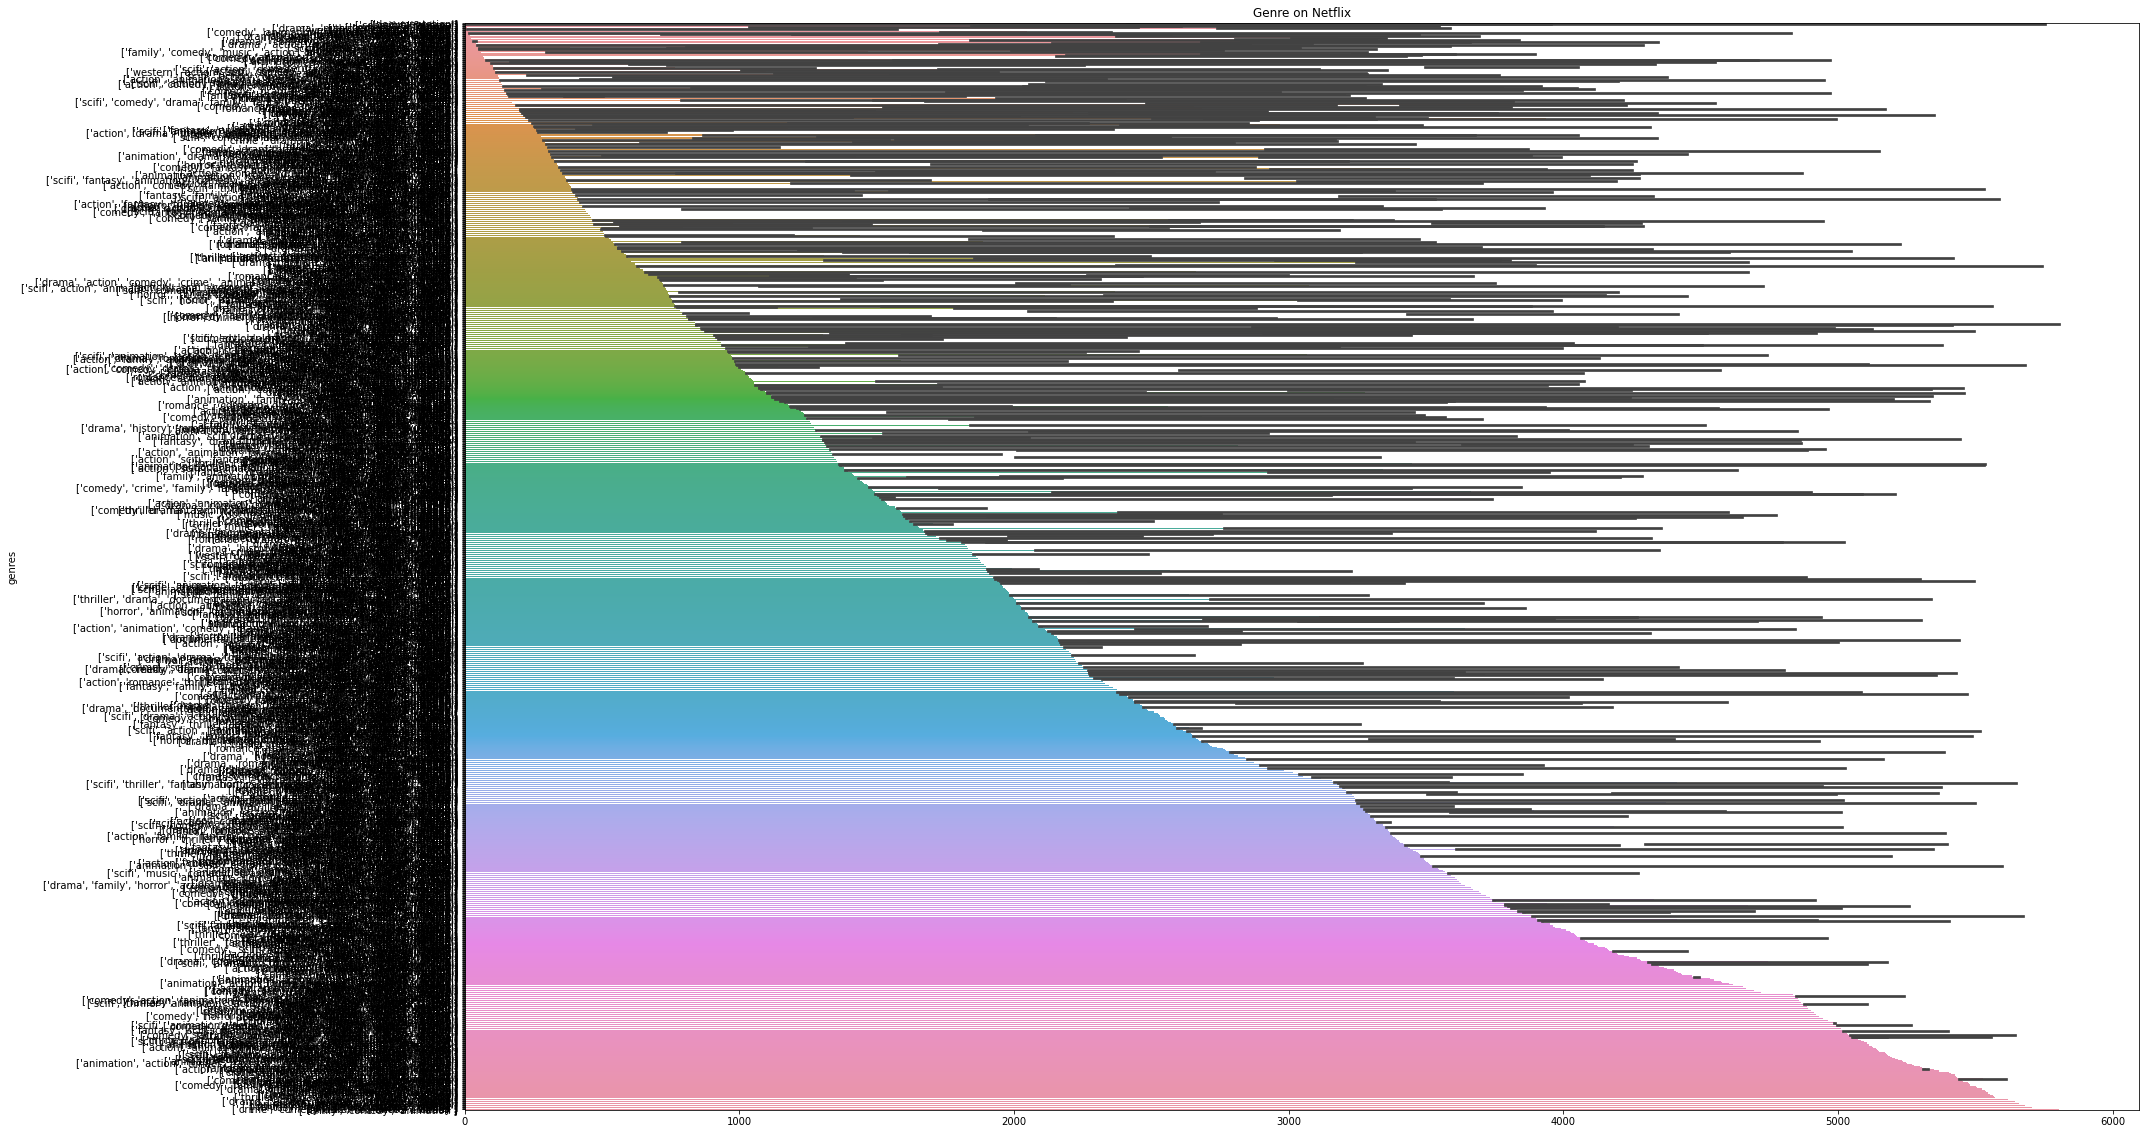

In [92]:
plt.figure(figsize=(30,20))

plt.title('Genre on Netflix')
sns.barplot(y=Movies['genres'], x=Movies.index)
plt.show()


In [15]:
# the graph above is too ambigous so we regroup the genres feature


pd.DataFrame(Movies['genres'].value_counts().head(15))
#comedy, drama,reality,document seems to be common genres.
#some genres are duplicates arranged in different ways


,genres
['comedy'],510
['drama'],350
['documentation'],320
"['comedy', 'drama']",141
"['drama', 'comedy']",128
['reality'],120
"['drama', 'romance']",112
"['comedy', 'documentation']",93
['animation'],69
[],68


In [16]:
pd.DataFrame(Movies['genres'].value_counts().tail(15))
#family, romance,european,scifi,thriller,western,action seems to be less attracting so they can be grouped


,genres
"['family', 'drama', 'war']",1
"['action', 'drama', 'family', 'romance']",1
"['comedy', 'family', 'romance', 'drama', 'fantasy']",1
"['fantasy', 'thriller', 'action']",1
"['documentation', 'sport', 'comedy', 'european']",1
"['romance', 'animation', 'drama', 'family']",1
"['action', 'horror', 'scifi', 'thriller', 'animation']",1
"['horror', 'thriller', 'scifi', 'action', 'fantasy']",1
"['scifi', 'drama', 'action', 'thriller']",1
"['scifi', 'animation', 'action', 'drama']",1


In [17]:


Movies.loc[Movies['genres'].str.contains("'comedy'"), 'genres'] = 'comedy'
Movies.loc[Movies['genres'].str.contains("'documentation'"), 'genres'] = 'documentation'
Movies.loc[Movies['genres'].str.contains("'reality'"), 'genres'] = 'reality'
Movies.loc[Movies['genres'].str.contains("'drama'"), 'genres'] = 'drama'
Movies.loc[Movies['genres'].str.contains("'animation'"), 'genres'] = 'animation'
Movies.loc[Movies['genres'].str.contains("'horror"), 'genres'] = 'horror'
Movies.loc[Movies['genres'].str.contains("fantasy"), 'genres'] = 'fantasy'
Movies.loc[Movies['genres'].str.contains("'romance'"), 'genres'] = 'romance'


Movies.loc[Movies['genres'].str.contains("'action'"), 'genres'] = 'action'
Movies.loc[Movies['genres'].str.contains("'war'"), 'genres'] = 'action'


Movies.loc[Movies['genres'].str.contains("'crime'"), 'genres'] = 'crime'
Movies.loc[Movies['genres'].str.contains("'thriller'"), 'genres'] = 'crime'


Movies.loc[Movies['genres'].str.contains("'family"), 'genres'] = 'family'
Movies.loc[Movies['genres'].str.contains("'family"), 'genres'] = 'family'


Movies.loc[Movies['genres'].str.contains("scifi"), 'genres'] = 'others'
Movies.loc[Movies['genres'].str.contains("music"), 'genres'] = 'others'
Movies.loc[Movies['genres'].str.contains("western"), 'genres'] = 'others'
Movies.loc[Movies['genres'].str.contains("histroy"), 'genres'] = 'others'












In [18]:
Movies =Movies[Movies['genres'] != '[]']


In [19]:
pd.DataFrame(Movies['genres'].value_counts())


,genres
comedy,2269
drama,1871
documentation,768
animation,211
reality,157
action,140
horror,114
crime,85
fantasy,41
romance,29


In [20]:
Movies['production_countries'].value_counts()

#there are 449 levels of production countries with highest production to be United States, India,Japan(wow)

['US']                1931
['IN']                 604
['JP']                 264
['GB']                 217
['KR']                 207
                      ... 
['AF', 'DE', 'PS']       1
['UY', 'MX', 'ES']       1
['LB', 'PS']             1
['PH', 'FO']             1
['GB', 'IE']             1
Name: production_countries, Length: 447, dtype: int64

In [21]:
pd.DataFrame(Movies['production_countries'].value_counts().head(10))

#regroup into these 10 production countries


,production_countries
['US'],1931
['IN'],604
['JP'],264
['GB'],217
['KR'],207
[],205
['ES'],159
['FR'],124
['CA'],100
['MX'],95


In [22]:
Movies.loc[Movies['production_countries'].str.contains(
    "'US'"), 'production_countries'] = 'US'

Movies.loc[Movies['production_countries'].str.contains(
    "'IN'"), 'production_countries'] = 'IN'

    
Movies.loc[Movies['production_countries'].str.contains(
    "'JP'"), 'production_countries'] = 'JP'

    
Movies.loc[Movies['production_countries'].str.contains(
    "'GB'"), 'production_countries'] = 'GB'

    
Movies.loc[Movies['production_countries'].str.contains(
    "'ES'"), 'production_countries'] = 'ES'

Movies.loc[Movies['production_countries'].str.contains(
    "'FR'"), 'production_countries'] = 'FR'

    
Movies.loc[Movies['production_countries'].str.contains(
    "'CA'"), 'production_countries'] = 'CA'

    
Movies.loc[Movies['production_countries'].str.contains(
    "'MX'"), 'production_countries'] = 'MX'

Movies.loc[Movies['production_countries'].str.contains(
    "'US'"), 'production_countries'] = 'US'

    
Movies.loc[Movies['production_countries'].str.contains(
    "'KR'"), 'production_countries'] = 'KR'

Movies.loc[Movies['production_countries'].str.contains(
    "'BR'"), 'production_countries'] = 'BR'

Movies.loc[Movies['production_countries'].str.contains(
    "'PH'"), 'production_countries'] = 'PH'

Movies.loc[Movies['production_countries'].str.contains(
    "'TR'"), 'production_countries'] = 'TR'

Movies.loc[Movies['production_countries'].str.contains(
    "'NG'"), 'production_countries'] = 'NG'

Movies.loc[Movies['production_countries'].str.contains(
    "'DE'"), 'production_countries'] = 'DE'

Movies.loc[Movies['production_countries'].str.contains(
    "'CN'"), 'production_countries'] = 'CN'



In [23]:
Movies['production_countries'].value_counts().head(15)


US    2307
IN     619
JP     270
GB     268
KR     207
[]     205
ES     196
FR     189
CA     112
MX     100
BR      87
PH      83
TR      79
DE      78
CN      75
Name: production_countries, dtype: int64

In [24]:
Us = Movies[Movies['production_countries'] =='US']
IN = Movies[Movies['production_countries'] =='IN']
JP = Movies[Movies['production_countries'] =='JP']
GB = Movies[Movies['production_countries'] =='GB']
KR = Movies[Movies['production_countries'] =='KR']
ES = Movies[Movies['production_countries'] =='ES']
FR = Movies[Movies['production_countries'] =='FR']
CA = Movies[Movies['production_countries'] =='CA']
MX = Movies[Movies['production_countries'] =='MX']
BR = Movies[Movies['production_countries'] =='BR']
PH = Movies[Movies['production_countries'] =='PH']
TR = Movies[Movies['production_countries'] =='TR']
DE = Movies[Movies['production_countries'] =='DE']

CN = Movies[Movies['production_countries'] =='CN']
NG = Movies[Movies['production_countries'] =='NG']

Movies = pd.concat([Us, IN, JP,GB,KR,ES,FR,CA,MX,BR,PH,TR,DE,CN,NG])
Movies


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,drama,US,NaN,tt0075314,8.3,795222.0,27.612,8.2
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,NaN,tt0070047,8.1,391942.0,95.337,7.7
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,action,US,NaN,tt0066999,7.7,153463.0,14.745,7.5
7,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,drama,US,NaN,tt0058385,7.8,94121.0,15.949,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,tm1068720,D.O.D.: Day of Destiny,MOVIE,"The thrilling adventure of Chidi and Rotimi, t...",2021,NaN,110,drama,NG,NaN,tt15149712,5.0,37.0,1.869,NaN
5740,tm1043655,One Lagos Night,MOVIE,A desperate man attempts to burglarize the hom...,2021,NaN,103,comedy,NG,NaN,tt14211236,6.9,15.0,2.622,NaN
5759,tm1122095,A Naija Christmas,MOVIE,A mother's Christmas wish - and the grand priz...,2021,NaN,121,comedy,NG,NaN,tt15565704,4.7,336.0,40.559,7.0
5799,ts307884,HQ Barbers,SHOW,When a family run barber shop in the heart of ...,2021,TV-14,24,comedy,NG,1.0,NaN,NaN,NaN,0.600,NaN


In [25]:
a = Movies['runtime'].mean()
b = max(Movies.runtime)
c =min(Movies.runtime)

print('The mean duration for a an episode is {} minutes, the maximum is {}, and the minimum is {}'.format(a,b,c))

The mean duration for a an episode is 79.1449978894048 minutes, the maximum is 229, and the minimum is 0


In [26]:
#removing the 14 productions


Movies[Movies['runtime'] == 0].count()




id                      14
title                   14
type                    14
description             14
release_year            14
age_certification       11
runtime                 14
genres                  14
production_countries    14
seasons                 14
imdb_id                 12
imdb_score              10
imdb_votes              10
tmdb_popularity         13
tmdb_score              11
dtype: int64

In [27]:
Movies = Movies[Movies['runtime'] != 0]


In [28]:

you_can_go =['imdb_id']

Movies.drop( you_can_go , axis =1, inplace= True)


c:\Users\POPOOLA KAYODE\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
pd.DataFrame(Movies.isnull().sum())


,0
id,0
title,0
type,0
description,6
release_year,0
age_certification,1964
runtime,0
genres,0
production_countries,0
seasons,3100


In [30]:
pd.DataFrame(Movies['age_certification'].value_counts())
Movies['age_certification'].fillna('unknown', inplace = True)

#there are 11 age_certification
#there are 2433 NaN

c:\Users\POPOOLA KAYODE\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [31]:
Movies['age_certification'].value_counts()

unknown    1964
TV-MA       664
R           541
PG-13       413
TV-14       380
PG          237
TV-PG       159
G           108
TV-Y7       101
TV-Y         77
TV-G         67
NC-17        13
Name: age_certification, dtype: int64

Text(0.5, 0, 'Number of show/movie')

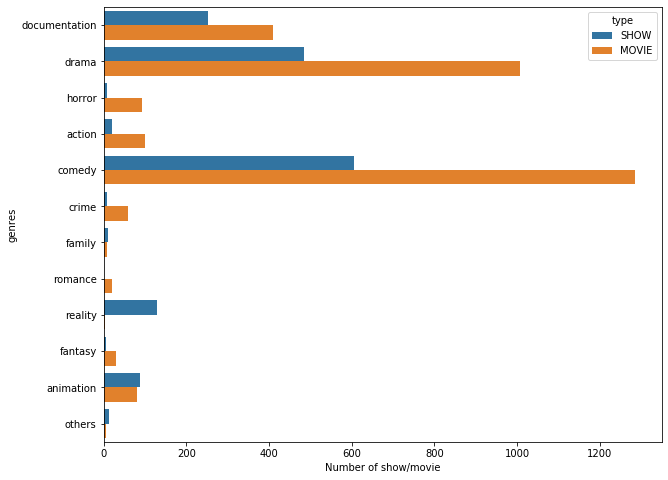

In [32]:
plt.figure(figsize=(10,8))
graph =sns.countplot(y='genres', hue = 'type',data=Movies)
graph.set_xlabel('Number of show/movie')


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 9.000e+00, 3.000e+00,
        9.000e+00, 5.000e+00, 6.000e+00, 1.300e+01, 1.000e+01, 2.000e+01,
        4.000e+00, 3.200e+01, 1.200e+01, 2.300e+01, 2.500e+01, 2.400e+01,
        2.200e+01, 4.600e+01, 6.100e+01, 4.200e+01, 1.030e+02, 5.400e+01,
        1.520e+02, 9.300e+01, 2.660e+02, 2.050e+02, 8.200e+02, 6.220e+02,
        1.295e+03, 7.240e+02]),
 array([1945.  , 1946.54, 1948.08, 1949.62, 1951.16, 1952.7 , 1954.24,
        1955.78, 1957.32, 1958.86, 1960.4 , 1961.94, 1963.48, 1965.02,
        1966.56, 1968.1 , 1969.64, 1971.18, 1972.72, 1974.26, 1975.8 ,
        1977.34, 1978.88, 1980.42, 1981.96, 1983.5 , 1985.04, 1986.58,
        1988.12, 1989.66, 1991.2 , 1992.74, 1994.28, 1995.82, 1997.36,
        1998.9 , 2000

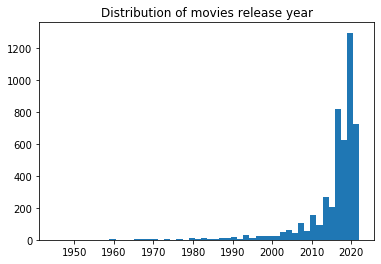

In [33]:
plt.title('Distribution of movies release year')
plt.hist(Movies['release_year'], bins = 50)

(array([2.425e+03, 3.750e+02, 1.290e+02, 5.600e+01, 4.500e+01, 2.200e+01,
        8.000e+00, 1.200e+01, 8.000e+00, 9.000e+00, 5.000e+00, 4.000e+00,
        5.000e+00, 5.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([5.50910000e-02, 2.91556892e+01, 5.82562874e+01, 8.73568855e+01,
        1.16457484e+02, 1.45558082e+02, 1.74658680e+02, 2.03759278e+02,
        2.32859876e+02, 2.61960475e+02, 2.91061073e+02, 3.20161671e+02,
        3.49262269e+02, 3.78362867e+02, 4.07463466e+02, 4.36564064e+02,
        4.65664662e+02, 4.94765260e+02, 5.23865858e+02, 5.52966456e+02,
        5.820670

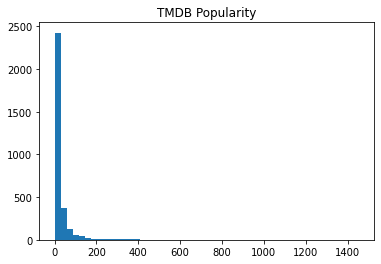

In [303]:
plt.title('TMDB Popularity')
plt.hist(Movies['tmdb_popularity'], bins=50)


(array([ 22.,  46.,  57.,  65., 285., 228., 116.,  79., 129., 278., 150.,
        137., 177., 118., 110.,  72.,  72., 112., 201., 264., 348., 221.,
        270., 175., 160., 148.,  92., 118.,  80.,  80.,  65.,  46.,  42.,
         34.,  26.,  34.,  12.,  21.,   9.,   6.,   4.,   3.,   2.,   1.,
          1.,   3.,   1.,   0.,   1.,   3.]),
 array([  2.  ,   6.54,  11.08,  15.62,  20.16,  24.7 ,  29.24,  33.78,
         38.32,  42.86,  47.4 ,  51.94,  56.48,  61.02,  65.56,  70.1 ,
         74.64,  79.18,  83.72,  88.26,  92.8 ,  97.34, 101.88, 106.42,
        110.96, 115.5 , 120.04, 124.58, 129.12, 133.66, 138.2 , 142.74,
        147.28, 151.82, 156.36, 160.9 , 165.44, 169.98, 174.52, 179.06,
        183.6 , 188.14, 192.68, 197.22, 201.76, 206.3 , 210.84, 215.38,
        219.92, 224.46, 229.  ]),
 <a list of 50 Patch objects>)

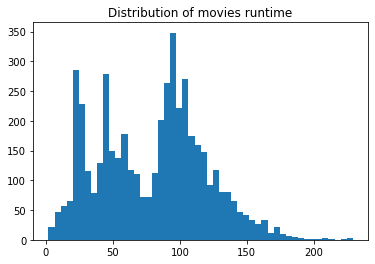

In [34]:
plt.title('Distribution of movies runtime')
plt.hist(Movies['runtime'], bins = 50)

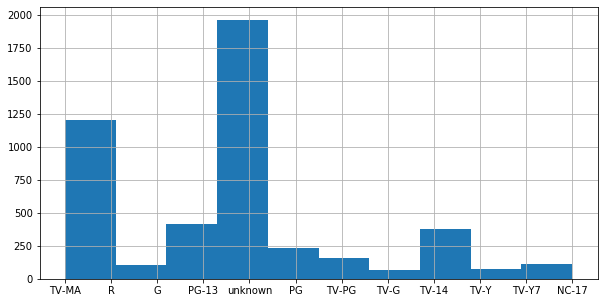

In [35]:
Movies['age_certification'].hist(figsize = (10,5))

Text(0.5, 1.0, 'Rating per genres')

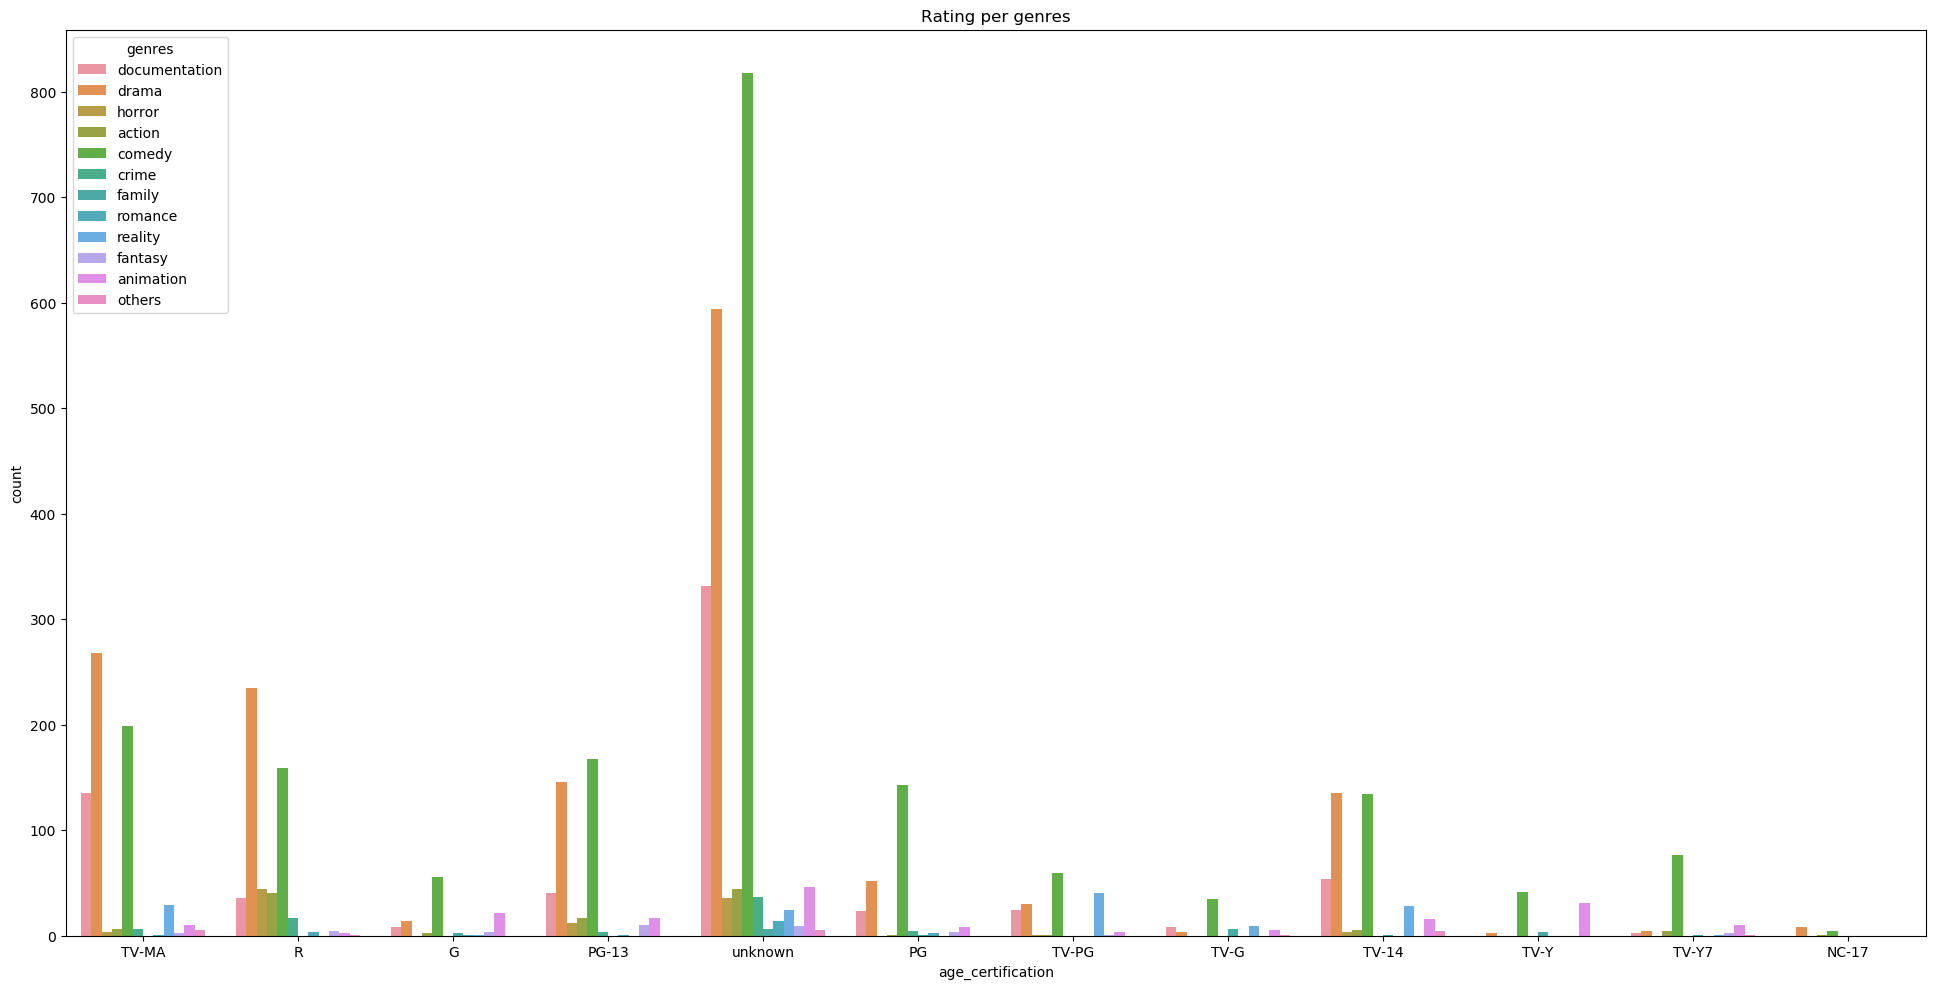

In [36]:
plt.figure(figsize=(24, 12), dpi=100)
sns.countplot(data=Movies, x="age_certification", hue="genres")
plt.title('Rating per genres')

In [37]:
Movies.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.211139,-0.542800,-0.075979,-0.207621,0.013354,0.062149
runtime,-0.211139,1.000000,-0.142684,-0.156268,0.140152,-0.048873,-0.297059
seasons,-0.542800,-0.142684,1.000000,0.084458,0.207668,0.364189,0.022960
imdb_score,-0.075979,-0.156268,0.084458,1.000000,0.203772,0.060017,0.630801
imdb_votes,-0.207621,0.140152,0.207668,0.203772,1.000000,0.236286,0.121785
tmdb_popularity,0.013354,-0.048873,0.364189,0.060017,0.236286,1.000000,0.106966
tmdb_score,0.062149,-0.297059,0.022960,0.630801,0.121785,0.106966,1.000000


In [38]:
pd.DataFrame(Movies['genres'].value_counts())

,genres
comedy,1891
drama,1491
documentation,661
animation,169
reality,132
action,121
horror,99
crime,67
fantasy,34
romance,22


In [39]:
Movies[Movies['genres'] == 'drama'].sort_values(
    by= 'imdb_votes', ascending=False).head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
243,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,drama,US,5.0,9.5,1727694.0,337.419,8.8
706,tm41792,Django Unchained,MOVIE,"With the help of a German bounty hunter, a fre...",2012,R,165,drama,US,NaN,8.4,1472668.0,56.588,8.1
111,tm57554,Saving Private Ryan,MOVIE,"As U.S. troops storm the beaches of Normandy, ...",1998,R,169,drama,US,NaN,8.6,1346020.0,54.874,8.2
1219,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,52,drama,US,5.0,8.7,989090.0,249.853,8.6
244,ts9,The Walking Dead,SHOW,Sheriff's deputy Rick Grimes awakens from a co...,2010,TV-MA,46,drama,US,11.0,8.2,945125.0,773.190,8.1
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,drama,US,NaN,8.3,795222.0,27.612,8.2
927,tm140877,The Imitation Game,MOVIE,Based on the real life story of legendary cryp...,2014,PG-13,113,drama,US,NaN,8.0,748654.0,46.710,8.0
52,tm22327,Full Metal Jacket,MOVIE,A pragmatic U.S. Marine observes the dehumaniz...,1987,R,116,drama,US,NaN,8.3,723306.0,36.502,8.1
276,tm86803,The Social Network,MOVIE,The tale of a new breed of cultural insurgent:...,2010,PG-13,121,drama,US,NaN,7.8,681286.0,33.023,7.3
1830,tm232797,Dunkirk,MOVIE,The story of the miraculous evacuation of Alli...,2017,PG-13,107,drama,US,NaN,7.8,619645.0,33.050,7.5


In [40]:
Movies[Movies['genres'] == 'comedy'].sort_values(
    by='imdb_votes', ascending=False).head(10)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
108,tm122434,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,comedy,US,NaN,8.8,1994599.0,57.114,8.5
262,tm87484,How to Train Your Dragon,MOVIE,As the son of a Viking leader on the cusp of m...,2010,PG,98,comedy,US,NaN,8.1,719717.0,71.782,7.8
727,tm59428,Silver Linings Playbook,MOVIE,After spending eight months in a mental instit...,2012,R,122,comedy,US,NaN,7.7,697481.0,26.254,7.1
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,comedy,GB,NaN,8.2,530877.0,18.216,7.8
702,tm166064,"Crazy, Stupid, Love.",MOVIE,Cal Weaver is living the American dream. He ha...,2011,PG-13,118,comedy,US,NaN,7.4,507878.0,30.363,7.3
4853,tm856378,Don't Look Up,MOVIE,Two low-level astronomers must go on a giant m...,2021,R,138,comedy,US,NaN,7.2,498447.0,115.376,7.2
286,tm133767,Love Actually,MOVIE,'Love Actually' follows the lives of eight ver...,2003,R,139,comedy,US,NaN,7.6,474176.0,21.297,7.1
273,tm160815,Charlie and the Chocolate Factory,MOVIE,A young boy wins a tour through the most magni...,2005,PG,106,comedy,US,NaN,6.6,465995.0,156.231,7.0
713,tm164877,Midnight in Paris,MOVIE,A romantic comedy about a family traveling to ...,2011,PG-13,94,comedy,US,NaN,7.7,413541.0,26.775,7.5
1217,ts8,Better Call Saul,SHOW,Six years before Saul Goodman meets Walter Whi...,2015,TV-MA,49,comedy,US,6.0,8.8,404920.0,352.657,8.5


In [41]:
Movies['production_countries'].value_counts().head(10)

US    2296
IN     618
JP     269
GB     268
KR     207
ES     196
FR     189
CA     112
MX     100
BR      86
Name: production_countries, dtype: int64

In [42]:

Movies.head()

Movies[Movies['production_countries'] == 'US'].sort_values(by= 'imdb_votes', ascending=False).head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
260,tm92641,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,148,action,US,NaN,8.8,2268288.0,109.090,8.4
108,tm122434,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,comedy,US,NaN,8.8,1994599.0,57.114,8.5
243,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,drama,US,5.0,9.5,1727694.0,337.419,8.8
706,tm41792,Django Unchained,MOVIE,"With the help of a German bounty hunter, a fre...",2012,R,165,drama,US,NaN,8.4,1472668.0,56.588,8.1
111,tm57554,Saving Private Ryan,MOVIE,"As U.S. troops storm the beaches of Normandy, ...",1998,R,169,drama,US,NaN,8.6,1346020.0,54.874,8.2
1219,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,52,drama,US,5.0,8.7,989090.0,249.853,8.6
244,ts9,The Walking Dead,SHOW,Sheriff's deputy Rick Grimes awakens from a co...,2010,TV-MA,46,drama,US,11.0,8.2,945125.0,773.190,8.1
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,drama,US,NaN,8.3,795222.0,27.612,8.2
927,tm140877,The Imitation Game,MOVIE,Based on the real life story of legendary cryp...,2014,PG-13,113,drama,US,NaN,8.0,748654.0,46.710,8.0
52,tm22327,Full Metal Jacket,MOVIE,A pragmatic U.S. Marine observes the dehumaniz...,1987,R,116,drama,US,NaN,8.3,723306.0,36.502,8.1


In [43]:
Movies[Movies['production_countries'] == 'IN'].sort_values(
    by='imdb_votes', ascending=False).head(10)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
368,tm142564,3 Idiots,MOVIE,In the tradition of “Ferris Bueller’s Day Off”...,2009,PG-13,170,comedy,IN,NaN,8.4,385782.0,49.398,8.0
414,tm83786,Like Stars on Earth,MOVIE,Ishaan Awasthi is an eight-year-old whose worl...,2007,PG,165,drama,IN,NaN,8.3,188234.0,12.931,8.0
1375,tm245671,Dangal,MOVIE,Dangal is an extraordinary true story based on...,2016,PG,161,drama,IN,NaN,8.4,180247.0,14.572,8.0
1033,tm147913,PK,MOVIE,A stranger in the city asks questions no one h...,2014,PG-13,153,comedy,IN,NaN,8.2,178012.0,9.887,7.7
507,tm32885,Rang De Basanti,MOVIE,After a group of friends graduate from Delhi U...,2006,PG-13,157,comedy,IN,NaN,8.1,118092.0,8.761,7.2
1288,tm137002,Bāhubali: The Beginning,MOVIE,The young Shivudu is left as a foundling in a ...,2015,PG-13,159,drama,IN,NaN,8.0,117333.0,51.091,7.5
397,tm43399,Lagaan: Once Upon a Time in India,MOVIE,"In 1890s India, an arrogant British commander ...",2001,PG,224,drama,IN,NaN,8.1,111053.0,7.249,7.3
1994,tm221953,Bāhubali 2: The Conclusion,MOVIE,"When Mahendra, the son of Bāhubali, learns abo...",2017,unknown,168,drama,IN,NaN,8.2,91560.0,36.891,7.3
2136,tm423373,Andhadhun,MOVIE,A series of mysterious events changes the life...,2018,R,139,comedy,IN,NaN,8.2,88359.0,8.457,7.7
2216,ts80959,Sacred Games,SHOW,A link in their pasts leads an honest cop to a...,2018,TV-MA,50,drama,IN,2.0,8.6,85088.0,11.750,8.1


In [44]:
Movies[Movies['production_countries'] == 'NG'].sort_values(
    by='imdb_votes', ascending=False).head(10)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4750,tm1000551,Namaste Wahala,MOVIE,A Nigerian woman and an Indian man won't let c...,2020,unknown,106,comedy,NG,NaN,5.2,1536.0,5.519,7.7
2954,tm431081,Lionheart,MOVIE,In order to save her father's ailing bus compa...,2018,unknown,95,comedy,NG,NaN,5.7,1444.0,4.696,6.0
4493,tm946795,Citation,MOVIE,A bright student in Nigeria takes on the acade...,2020,unknown,151,drama,NG,NaN,6.1,958.0,6.216,7.4
4505,tm931701,Òlòtūré,MOVIE,"In Lagos, Nigeria, young, naive Nigerian journ...",2019,unknown,106,drama,NG,NaN,5.5,774.0,6.252,6.1
1152,tm197423,October 1,MOVIE,"Its September 1960, and with Nigeria on the ve...",2014,PG-13,149,crime,NG,NaN,6.4,424.0,3.018,6.2
2904,tm449860,King of Boys,MOVIE,"The story of Alhaja Eniola Salami, a businessw...",2018,unknown,169,drama,NG,NaN,6.1,404.0,3.082,6.4
5759,tm1122095,A Naija Christmas,MOVIE,A mother's Christmas wish - and the grand priz...,2021,unknown,121,comedy,NG,NaN,4.7,336.0,40.559,7.0
2649,tm481188,Isoken,MOVIE,Everyone in the Osayande family worries about ...,2017,unknown,100,comedy,NG,NaN,6.6,306.0,2.468,4.7
5535,tm1114205,Amina,MOVIE,"In 16th-century Zazzau, now Zaria, Nigeria, Am...",2021,PG-13,120,drama,NG,NaN,3.9,289.0,167.727,6.5
3012,tm349418,The Royal Hibiscus Hotel,MOVIE,A disillusioned London chef visits Nigeria and...,2018,unknown,90,comedy,NG,NaN,5.5,276.0,2.243,4.4


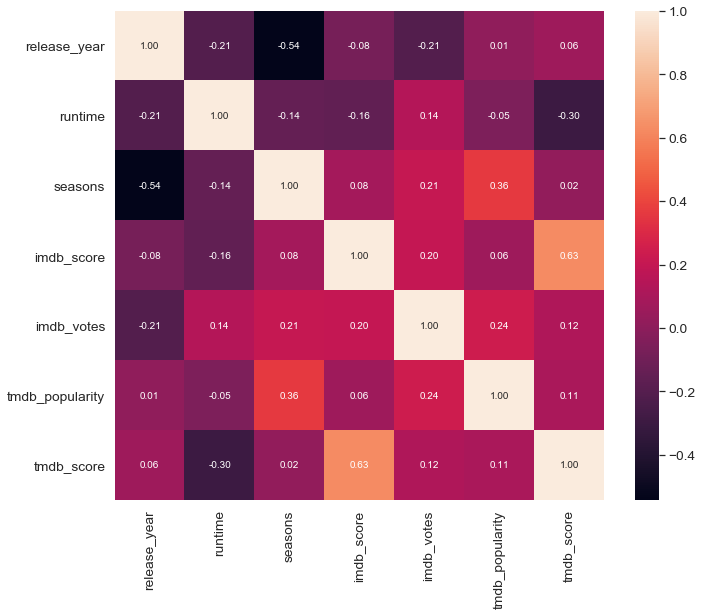

In [45]:
movie_corr =Movies.corr()

sns.set(font_scale=1.25)

fig, ax = plt.subplots(figsize =(11,9))

hm_movies = sns.heatmap(movie_corr, cbar =True, annot= True, square = True, fmt=".2f", annot_kws ={"size":10,}, yticklabels=movie_corr.index, xticklabels= movie_corr.index)



### conclusions

* Release year doesnt affect popularity or score, likewise runtime
* There is a high correlation between imdb score and tmdb score, seem they both have something together
* Seasons has small correlation with tmdb pupolarity, high popularuty should infer more seasons than on imdb votes
* Seasons reduced averagely over the year. this tells movies with lesser seasons
* Imdb vote has  low correlation with the seasons and popularity


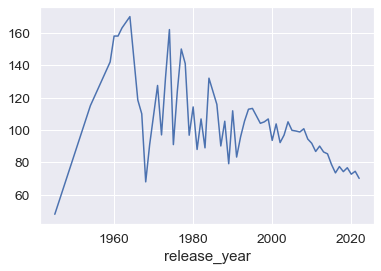

In [46]:
Movies.groupby(by ='release_year').mean()['runtime'].plot()

In [47]:


Movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,drama,US,NaN,8.3,795222.0,27.612,8.2
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,NaN,8.1,391942.0,95.337,7.7
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,action,US,NaN,7.7,153463.0,14.745,7.5
7,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,drama,US,NaN,7.8,94121.0,15.949,7.6


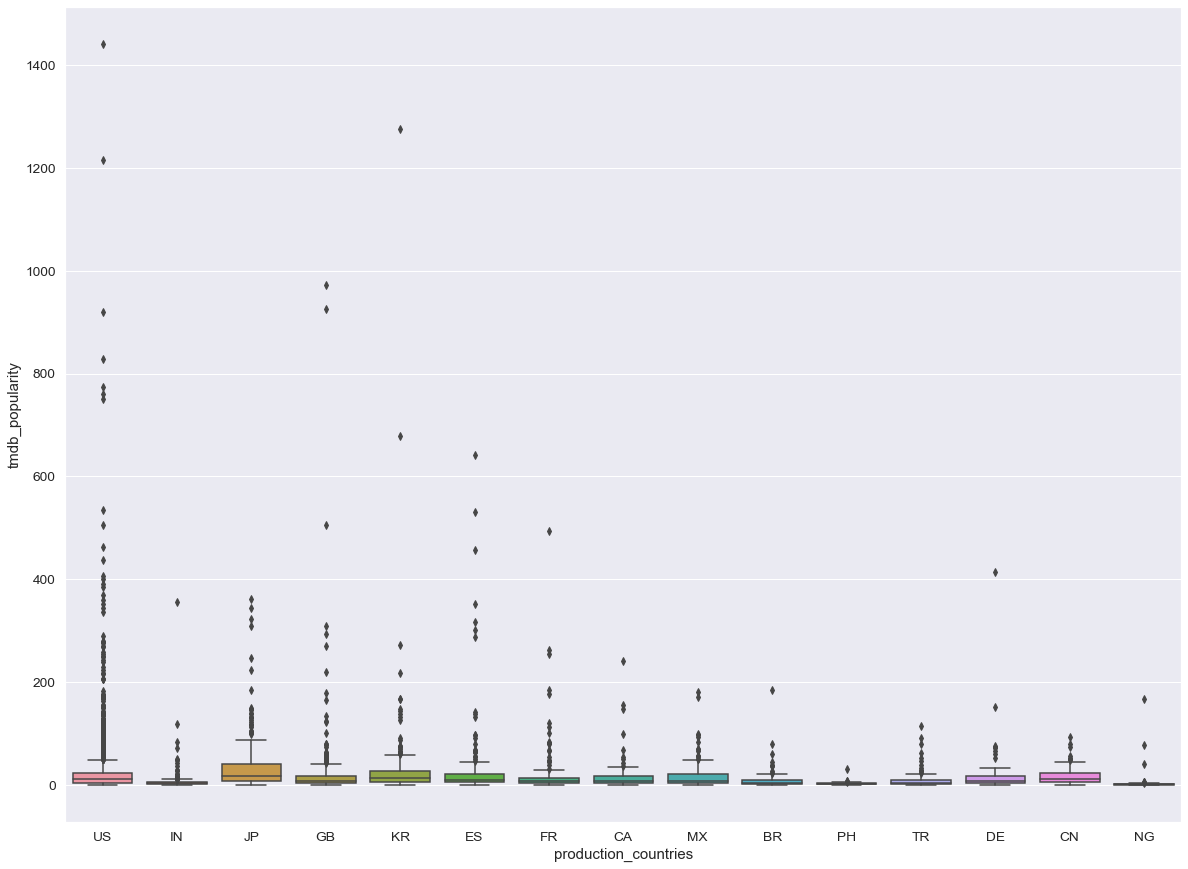

In [48]:
fig, ax = plt.subplots(figsize =(20,15))


sns.boxplot(x = Movies['production_countries'], y = Movies['tmdb_popularity'] )



In [49]:
credits = pd.read_csv('credits.csv')

credits.tail(12)

,person_id,id,name,character,role
77201,427034,tm1098060,Sola Sobowale,Amoke,ACTOR
77202,530813,tm1098060,Ken Erics,Aremu,ACTOR
77203,530811,tm1098060,Toyin Aimakhu-Johnson,NaN,ACTOR
77204,678884,tm1098060,Segun Arinze,Obanla,ACTOR
77205,168555,tm1098060,Jibola Dabo,King of Aje Land,ACTOR
77206,2050114,tm1098060,Rotimi Salami,Akinola,ACTOR
77207,2050257,tm1098060,Pa Jimi Solanke,Akanji's Father,ACTOR
77208,1347054,tm1098060,Nnenna Rachael Okonkwo,Afinni,ACTOR
77209,157590,tm1098060,Lucien Morgan,Dr. Ian Stones,ACTOR
77210,129059,tm1098060,Magdalena Korpas,Jane,ACTOR


In [54]:
id_uniques =credits['id'].unique()
id_uniques

array(['tm84618', 'tm127384', 'tm70993', ..., 'tm1108171', 'tm1045018',
       'tm1098060'], dtype=object)